### Decision Tree Exercises
        https://ds.codeup.com/classification/decision-trees/  
        Use Titanic

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix


import env
import acquire


import warnings
warnings.filterwarnings("ignore")

**1 / What is your baseline prediction? What is your baseline accuracy?**  
Remember :   
Your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode).   
When you make those predictions, what is your accuracy? This is your baseline accuracy.

**Baseline prediction :** More people die than survive. (Survived = 0 / False.)  
**Baseline accuracy :** According to the baseline model, 61.8pc of people will die

In [2]:
df = acquire.get_titanic_data('titanic_df')
df.head()

# alternate way to retrieve the data, using the function that I created in 'acquire'

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [3]:
tati = pd.read_csv('titanic.csv')
tati.survived.value_counts()

# pulling dataframe from .CSV
# doing .value_counts() to determine which will be baseline



0    549
1    342
Name: survived, dtype: int64

In [4]:
tati.columns

Index(['Unnamed: 0', 'passenger_id', 'survived', 'pclass', 'sex', 'age',
       'sibsp', 'parch', 'fare', 'embarked', 'class', 'deck', 'embark_town',
       'alone'],
      dtype='object')

In [5]:
tati.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [6]:
to_drop = ['deck', 'Unnamed: 0', 'age', 'embarked', 'passenger_id']

# indicating which unnecessary or superfluous columns to drop

In [7]:
tati.drop(columns = to_drop, inplace = True)

# dropping unnecessary or superfluous columns

In [8]:
tati = tati.dropna()
tati.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   sibsp        889 non-null    int64  
 4   parch        889 non-null    int64  
 5   fare         889 non-null    float64
 6   class        889 non-null    object 
 7   embark_town  889 non-null    object 
 8   alone        889 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 69.5+ KB


In [9]:
# baseline for survival is to die (ie, ['survived'] == '0').

tati[tati.survived == 0]

tati.head()

,survived,pclass,sex,sibsp,parch,fare,class,embark_town,alone
0,0,3,male,1,0,7.2500,Third,Southampton,0
1,1,1,female,1,0,71.2833,First,Cherbourg,0
2,1,3,female,0,0,7.9250,Third,Southampton,1
3,1,1,female,1,0,53.1000,First,Southampton,0
4,0,3,male,0,0,8.0500,Third,Southampton,1


In [10]:
# setting the baseline of 'survived' as 0, indicating that death is more common than survival.

tati['survival_baseline'] = 0
tati.head()


,survived,pclass,sex,sibsp,parch,fare,class,embark_town,alone,survival_baseline
0,0,3,male,1,0,7.2500,Third,Southampton,0,0
1,1,1,female,1,0,71.2833,First,Cherbourg,0,0
2,1,3,female,0,0,7.9250,Third,Southampton,1,0
3,1,1,female,1,0,53.1000,First,Southampton,0,0
4,0,3,male,0,0,8.0500,Third,Southampton,1,0


In [11]:
# Boolean baseline (T = 1, F = 0)

(tati['survival_baseline'] == tati['survived']).mean()

# baseline 61.8pc for 'will die'


0.6175478065241845

**2 / Fit the decision tree classifier to your training sample and transform. (I.e, make predictions on the training sample.)**

In [12]:
tati.drop(columns = 'class', inplace = True)

# dropping an additional column

In [13]:
# creating dummies in order to help machine learning

tatdum = pd.get_dummies(tati[['embark_town', 'sex']], drop_first = True)

tatdum.head()

,embark_town_Queenstown,embark_town_Southampton,sex_male
0,0,1,1
1,0,0,0
2,0,1,0
3,0,1,0
4,0,1,1


In [14]:
# now that we have the DF and the dummies, use concatenation to join the two :

pd.concat([tati, tatdum], axis = 1)

# assigning it a variable for permanence

taticon = pd.concat([tati, tatdum], axis = 1)
taticon.head()


,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,survival_baseline,embark_town_Queenstown,embark_town_Southampton,sex_male
0,0,3,male,1,0,7.2500,Southampton,0,0,0,1,1
1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0,0
2,1,3,female,0,0,7.9250,Southampton,1,0,0,1,0
3,1,1,female,1,0,53.1000,Southampton,0,0,0,1,0
4,0,3,male,0,0,8.0500,Southampton,1,0,0,1,1


In [15]:
# dropping columns for machine learning purposes (don't do this for exploration purposes)

taticon = taticon.drop(columns = ['embark_town', 'sex'], axis = 1)


In [16]:
taticon.columns

Index(['survived', 'pclass', 'sibsp', 'parch', 'fare', 'alone',
       'survival_baseline', 'embark_town_Queenstown',
       'embark_town_Southampton', 'sex_male'],
      dtype='object')

In [17]:
# setting the 'survived' column to Boolean T / F
taticon['survived'] = np.where(taticon['survived'] == True, '1', '0')

In [18]:
taticon['survived']

taticon.survived.value_counts()

0    549
1    340
Name: survived, dtype: int64

In [19]:

def train_val_test(df, target, seed = 23):
    
    train, val_test = train_test_split(df, train_size = 0.7, random_state = seed, stratify = df[target])
    
    val, test = train_test_split(val_test, train_size = 0.5, random_state = seed, stratify = val_test[target])
    
    return train, val, test

## function to train, validate, test data

In [20]:
train, val, test  = train_val_test(taticon, 'survived')

train.shape, val.shape, test.shape

# returning the data shapes / sizes to be trained, validated, tested

((622, 10), (133, 10), (134, 10))

In [21]:
## split train, val, test into X_train, X_val, X_test (feature DF, exludes var 'transported') and y-train, etc
# y_train is only our target
# X_train is everything except for 'survived'

X_train = train.drop(columns = ['survived'])
y_train = train['survived']


X_val = val.drop(columns = ['survived'])
y_val = val['survived']


X_test = test.drop(columns = ['survived'])
y_test = test['survived']

In [22]:
seed = 23

clf = DecisionTreeClassifier(max_depth = 3, random_state = seed)

# classifier = clf

In [23]:
clf = clf.fit(X_train, y_train)
clf
# fitting the model : 
    # it must know the features and the labels, in order to associate them with one another.
    
# with this step, the model has been trained.

DecisionTreeClassifier(max_depth=3, random_state=23)

In [24]:
# y_preds = vusual representation of survived columns

y_preds = clf.predict(X_train)


In [25]:
accuracy = clf.score(X_train, y_train)
accuracy

# accuracy = 'clf.score' tells us how accurate our model is.

# Makes predictions on the X_train set against the y_train reality.

# the X_train data is compared against y_train : 80.4pc accuracy

# this is the prediction model score

0.8038585209003215

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


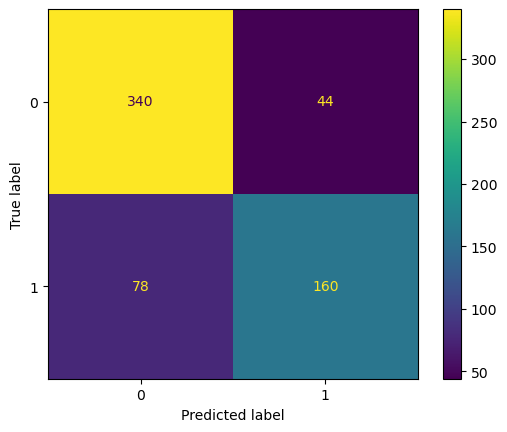

In [26]:
## plotting teh confusion matrix of clf

plot_confusion_matrix(clf, X_train, y_train)

# (prediction-model, X_train, y_train)

In [80]:
print(classification_report(y_train, y_preds))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       384
           1       0.96      0.86      0.91       238

    accuracy                           0.93       622
   macro avg       0.94      0.92      0.93       622
weighted avg       0.93      0.93      0.93       622



In [97]:
print(f"Our baseline accuracy for non-survival in all cases on the Titanic is {round(accuracy, 4)}.")

Our baseline accuracy for non-survival in all cases on the Titanic is 0.8039.


In [78]:
y_train.value_counts()

0    384
1    238
Name: survived, dtype: int64

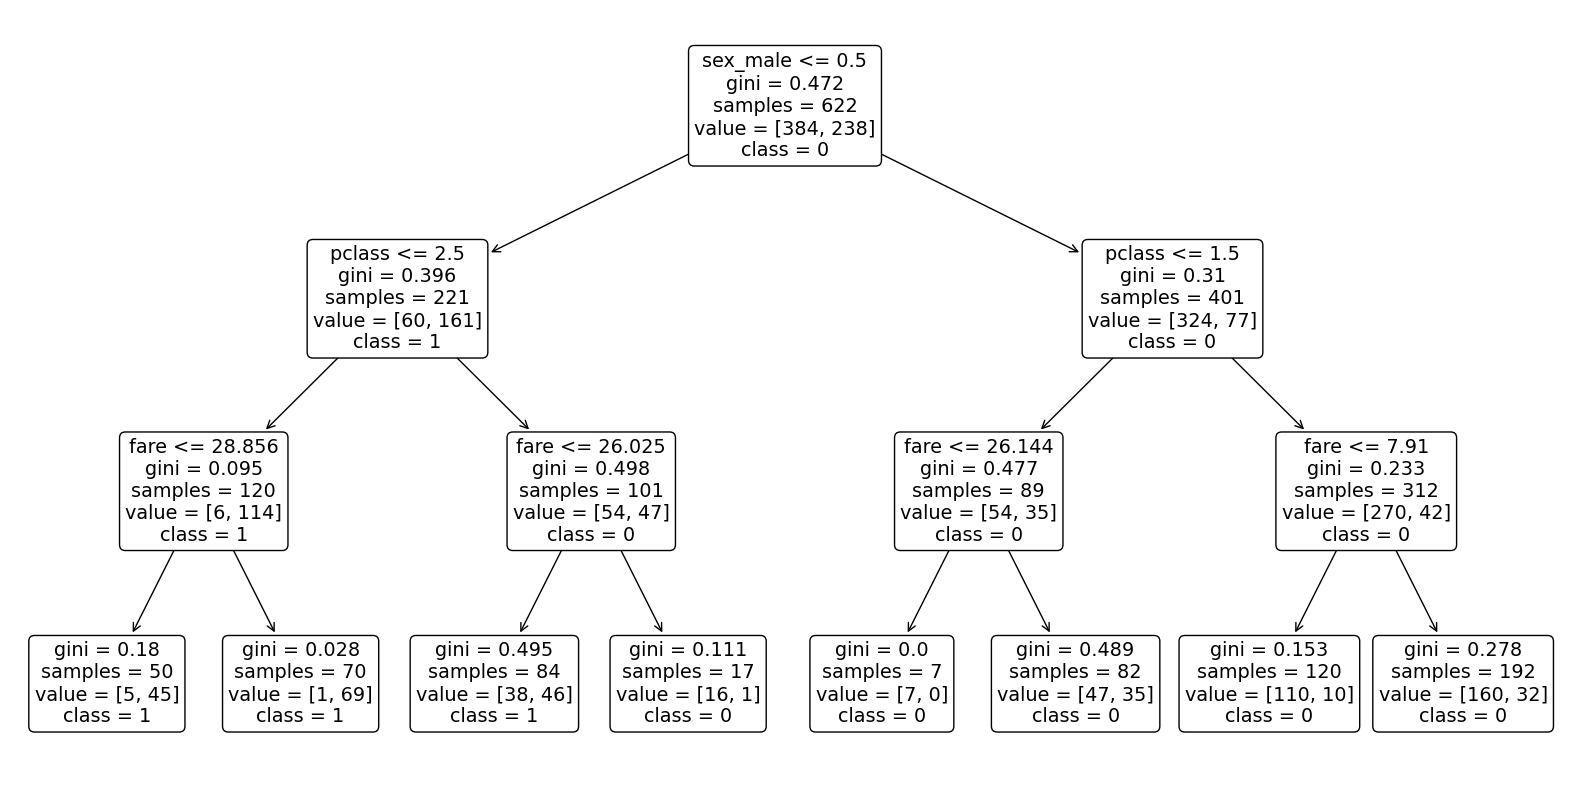

In [30]:
# plotting the decision tree

plt.figure(figsize = (20, 10))

plot_tree(clf, feature_names = X_train.columns, class_names = clf.classes_, rounded = True)

plt.show()

In [31]:
## if an error msg for class_names, use : class_names = np.array(clf.classes_).astype('str').tolist()

In [32]:
val_predictions = clf.predict(X_val)

#VALIDATION STEP

# predicted on X_Val, true values are on y_val

In [33]:
## classification report :

print(classification_report(y_val, val_predictions))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83        82
           1       0.73      0.69      0.71        51

    accuracy                           0.78       133
   macro avg       0.77      0.76      0.77       133
weighted avg       0.78      0.78      0.78       133



### 3 / Valuate your in-sample results using the model score, confusion matrix, and classification report.


**3.1 Model Score**

In [34]:
# finding the model score

clf.score(X_test, y_test)

0.8283582089552238

**3.2 Confusion Matrix**

In [35]:
# code necessary for the confusion matrix function to function

y_preds = pd.DataFrame({
    'y_act': y_train,
    'baseline': 0,
    'model_1': clf.predict(X_train)
})

In [36]:
y_preds

# visualising the y predictions

,y_act,baseline,model_1
481,0,0,0
165,1,0,0
260,0,0,0
360,0,0,0
809,1,0,1
...,...,...,...
51,0,0,0
590,0,0,0
41,0,0,1
820,1,0,1


In [37]:
# returning the confusion matrix
confusion_matrix(y_preds.y_act, y_preds.model_1)


array([[340,  44],
       [ 78, 160]])

In [38]:
# assigning confusion matrix values to appropriate variables

TN, FP, FN, TP = confusion_matrix(y_preds.y_act, y_preds.model_1).ravel()
TN, FP, FN, TP

(340, 44, 78, 160)

**3.3 Classification Report**

In [39]:
print(classification_report(y_val, val_predictions))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83        82
           1       0.73      0.69      0.71        51

    accuracy                           0.78       133
   macro avg       0.77      0.76      0.77       133
weighted avg       0.78      0.78      0.78       133



### 4 / Compute : Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score and support.

Accuracy = (TP + TN) / (TP + FP + TN + FN)  
Precision / PPV = TP / (TP + FP)  
NVP / negative predicted value = TN / (TN + FN)  
Specificity = TN / (FP + TN)  
Recall / Sensitivity : TP / (TP + FN)  

**Sensitivity, hit rate, recall, or true positive rate**  
TPR = TP/(TP+FN)  
**Specificity or true negative rate**  
TNR = TN/(TN+FP)   
**Precision or positive predictive value**  
PPV = TP/(TP+FP)  
**Negative predictive value**  
NPV = TN/(TN+FN)  
**Fall out or false positive rate**  
FPR = FP/(FP+TN)  
**False negative rate**  
FNR = FN/(TP+FN)  
**False discovery rate**  
FDR = FP/(TP+FP)  
**Overall accuracy**   
ACC = (TP+TN)/(TP+FP+FN+TN)

In [40]:
# Accuracy

(TP + TN) / (TP + FP + TN + FN)

0.8038585209003215

In [41]:
# Accuracy

sklearn.metrics.accuracy_score(y_preds.y_act, y_preds.model_1)

0.8038585209003215

In [42]:
# sensitivity / true positive rate / recall

TPR = TP / (TP + FN) 
TPR

0.6722689075630253

In [43]:
# sensitivity / true positive rate / recall

sklearn.metrics.recall_score(y_preds.y_act, y_preds.model_1, average = None)

array([0.88541667, 0.67226891])

In [44]:
# false negative rate

FN / (TP + FN)

0.3277310924369748

In [45]:
# precision / PPV

PPV = TP / (TP + FP)
PPV

0.7843137254901961

In [46]:
# precision / PPV

sklearn.metrics.precision_score(y_preds.y_act, y_preds.model_1, average = None)

array([0.81339713, 0.78431373])

In [47]:
# f1 score

f1 = 2 * (PPV * TPR) / (PPV + TPR)
f1

0.7239819004524887

In [48]:
# f1 score

sklearn.metrics.f1_score(y_preds.y_act, y_preds.model_1, average = None)

array([0.8478803, 0.7239819])

In [49]:
# support

support_pos = TP + FN ## positive cases
support_neg = FP + TN ## negative cases

support_pos, support_neg, y_train.value_counts()

(238,
 384,
 0    384
 1    238
 Name: survived, dtype: int64)

In [50]:
# support

sklearn.metrics.precision_recall_fscore_support(y_preds.y_act, y_preds.model_1, average = None)

(array([0.81339713, 0.78431373]),
 array([0.88541667, 0.67226891]),
 array([0.8478803, 0.7239819]),
 array([384, 238]))

In [51]:
## NVP / negative predicted value
TN / (TN + FN)

0.8133971291866029

In [52]:
## make a for-loop

for i in range(1, 21):
    
    trees = DecisionTreeClassifier(max_depth = i, random_state = 23)
    
    trees = trees.fit(X_train, y_train)
    
    y_preds = trees.predict(X_train)
    
    report = classification_report(y_train, y_preds, output_dict = True)
    
    
    print(' ')
    print(f'Tree with max depth of {i}.')
    print(' ')
    print(pd.DataFrame(report))
    print(' ')
    print('-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-')
    print(' ')

 
Tree with max depth of 1.
 
                    0           1  accuracy   macro avg  weighted avg
precision    0.807980    0.728507  0.779743    0.768243      0.777571
recall       0.843750    0.676471  0.779743    0.760110      0.779743
f1-score     0.825478    0.701525  0.779743    0.763501      0.778049
support    384.000000  238.000000  0.779743  622.000000    622.000000
 
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
 
 
Tree with max depth of 2.
 
                    0           1  accuracy   macro avg  weighted avg
precision    0.752988    0.950000  0.790997    0.851494      0.828372
recall       0.984375    0.478992  0.790997    0.731683      0.790997
f1-score     0.853273    0.636872  0.790997    0.745072      0.770470
support    384.000000  238.000000  0.790997  622.000000    622.000000
 
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
 
 
Tree with max depth of 3.
 
                    0           1  accuracy   macro avg  weighted avg
precision    0.813397    0.784314  0.803859    0.798855      0.8

In [53]:
## for-loop to look at differences in tree depths

metrics = []

for i in range(1,25):
    
    tree = DecisionTreeClassifier(max_depth = i, random_state = 23) ### make
    tree = tree.fit(X_train, y_train)  ## fit
    in_sample_accuracy = tree.score(X_train, y_train)
        # in-sample (train), out-of-sample (validate comparison ; could also be the 'test data')
    out_of_sample_accuracy = tree.score(X_val, y_val)
    
    output = { 'max_depth' : i, 
              "train_accuracy" : in_sample_accuracy, 
              "validate_accuracy" : out_of_sample_accuracy}
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df['difference'] = df.train_accuracy - df.validate_accuracy 
        # calculating difference between training and validation accuracy
    
df

# the differences of 17, 18 percent between training and validating accuracy means that the model is overfit

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.779743,0.774436,0.005307
1,2,0.790997,0.759398,0.031598
2,3,0.803859,0.781955,0.021904
3,4,0.819936,0.812030,0.007906
4,5,0.827974,0.774436,0.053538
5,6,0.845659,0.819549,0.026110
6,7,0.858521,0.834586,0.023934
7,8,0.872990,0.804511,0.068479
8,9,0.889068,0.766917,0.122150
9,10,0.898714,0.781955,0.116759


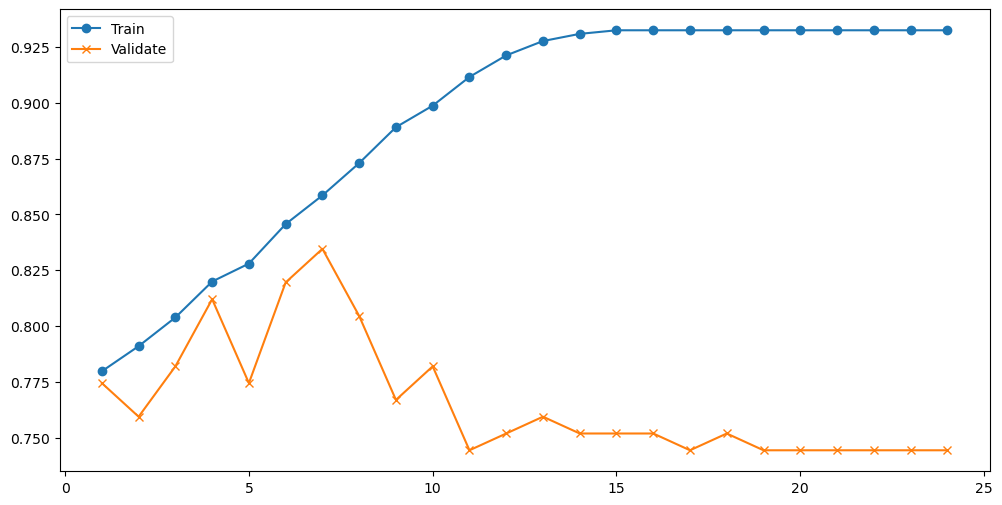

In [54]:
## visualise on a graph : plot validate and accuracy scores

plt.figure(figsize = (12, 6))

plt.plot(df.max_depth, df.train_accuracy, marker = 'o', label = 'Train')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'x', label = 'Validate')

plt.legend()
plt.show()

### Run through steps 2-4 using a different max_depth value.

In [55]:
# resetting max_depth to 50 nodes

seed = 23

clf50 = DecisionTreeClassifier(max_depth = 50, random_state = seed)


clf50.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=50, random_state=23)

In [56]:
clf50.score(X_train, y_train)

0.932475884244373

In [57]:
val_predictions50 = clf50.predict(X_val)

#VALIDATION STEP

# predicted on X_Val, true values are on y_val

In [58]:

## classification report for depth of 50 :

print(classification_report(y_val, val_predictions))

# precision model works best for validation data, at 73pc.

              precision    recall  f1-score   support

           0       0.81      0.84      0.83        82
           1       0.73      0.69      0.71        51

    accuracy                           0.78       133
   macro avg       0.77      0.76      0.77       133
weighted avg       0.78      0.78      0.78       133



In [59]:
# Model Score

clf50.score(X_test, y_test)

# cf model score of 0.8283582089552238 for a depth or 3

0.835820895522388

In [64]:
# confusion matrix

y_preds50 = pd.DataFrame({
    'y_act': y_train,
    'baseline': 0,
    'model_1': clf50.predict(X_train)
})

confu50 = confusion_matrix(y_preds50.y_act, y_preds50.model_1)

confu50

array([[376,   8],
       [ 34, 204]])

In [65]:
# confusion matrix

TN50, FP50, FN50, TP50 = confu50.ravel()
TN50, FP50, FN50, TP50


## cf (340, 44, 78, 160) for a depth of 3

(376, 8, 34, 204)

In [66]:
# Accuracy

(TP50 + TN50) / (TP50 + FP50 + TN50 + FN50)

# cf accuracy rate of 0.8038585209003215 for a depth of 3

0.932475884244373

In [72]:
# Accuracy

sklearn.metrics.accuracy_score(y_preds50.y_act, y_preds50.model_1)

0.932475884244373

In [ ]:
# sensitivity / true positive rate / recall

TPR_50 = TP50 / (TP50 + FN50) 
TPR_50

In [ ]:
# sensitivity / true positive rate / recall

sklearn.metrics.recall_score(y_preds.y_act, y_preds.model_1, average = None)

# cf sensitivity / recall rate of array([0.88541667, 0.67226891]) for a depth of 3

In [ ]:
# false negative rate

FN50 / (TP50 + FN50)

In [ ]:
# precision / PPV

PPV_50 = TP50 / (TP50 + FP50)
PPV_50

In [ ]:
# precision / PPV

sklearn.metrics.precision_score(y_preds.y_act, y_preds.model_1, average = None)

# cf precision of array([0.81339713, 0.78431373]) for a depth of 3

In [ ]:
# f1 score

f1_50 = 2 * (PPV_50 * TPR_50) / (PPV_50 + TPR_50)
f1_50

In [ ]:
# f1 score

sklearn.metrics.f1_score(y_preds.y_act, y_preds.model_1, average = None)

# cf f1 score of array([0.8478803, 0.7239819]) for a depth of 3

In [ ]:
# support

support_pos50 = TP50 + FN50
support_neg50 = FP50 + TN50

support_pos50, support_neg50

In [ ]:
# support

sklearn.metrics.precision_recall_fscore_support(y_preds.y_act, y_preds.model_1, average = None)

# cf array of (array([0.81339713, 0.78431373]),
             # array([0.88541667, 0.67226891]),
             # array([0.8478803, 0.7239819]),
             # array([384, 238])) 
# for a depth of 3

In [ ]:
## NVP / negative predicted value

TN50 / (TN50 + FN50)

# cf NVP of .81339 for a depth of 3

### 6 / Which model performs better on your in-sample data (i.e, the training set) ?

The precision model, at 96pc.

### 7 / Which model performs best on your out-of-sample data, the validate set ?

In [73]:
print('Accuracy of Decision Tree Classifier on validate set : {:.2f}'
     .format(clf50.score(X_val, y_val)))

Accuracy of Decision Tree Classifier on validate set : 0.74


In [74]:
# Produce y_predictions that come from the X_validate


val_predictions = clf50.predict(X_val)


# Compare actual 'y' values (from validate) to predicted y_values from the model run on X_validate

print(classification_report(y_val, val_predictions))

# val_predictions = y_pred

# it would appear that the precision model is most suited, at 73pc.

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        82
           1       0.69      0.61      0.65        51

    accuracy                           0.74       133
   macro avg       0.73      0.72      0.72       133
weighted avg       0.74      0.74      0.74       133

